In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots

First Analysis of how quasi thresholding does on its own

In [2]:
quasi_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\0\quasi")
quasi_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\1\quasi")

In [6]:
quasi_ec_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [7]:
quasi_eo_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [8]:
for i, pth in enumerate(quasi_ec_folder.iterdir()):
    current = np.load(pth)
    quasi_ec_results[i, :, :, :] = current.copy()

In [9]:
for i, pth in enumerate(quasi_eo_folder.iterdir()):
    current = np.load(pth)
    quasi_eo_results[i, :, :, :] = current.copy()

In [11]:
quasi_results = quasi_ec_results.__add__(quasi_ec_results)/2

In [12]:
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(0, 0)
(1, 1)
(1, 0)
(1, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

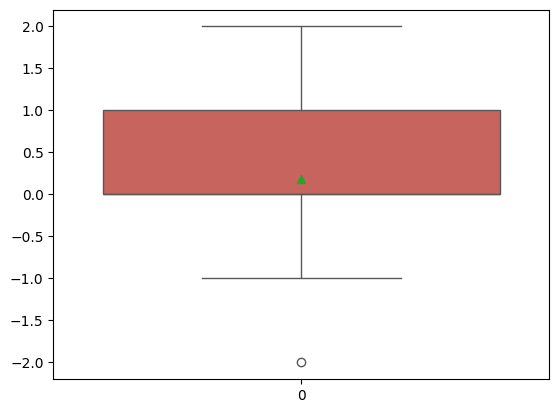

In [13]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

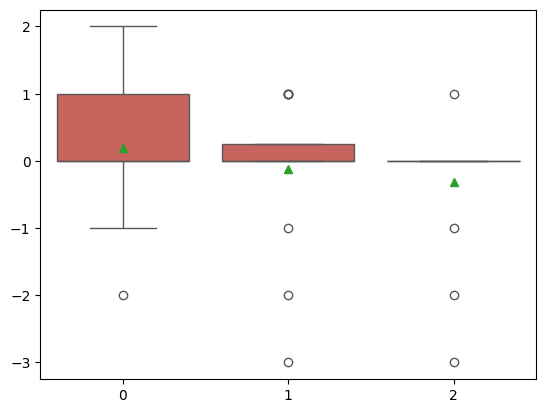

In [14]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten(), quasi_results[:, 0, 1, 1].flatten(), quasi_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

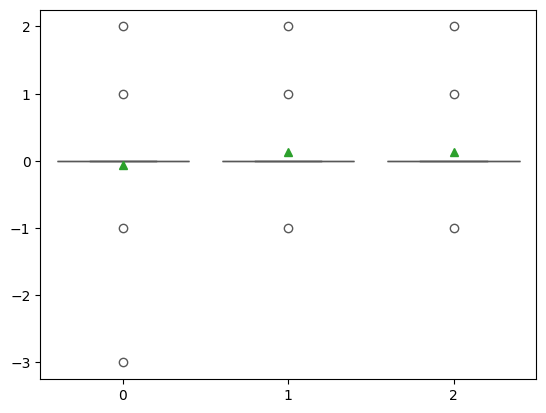

In [15]:
plot_n_boxplots([quasi_results[:, 1, 0, 1].flatten(), quasi_results[:, 1, 1, 1].flatten(), quasi_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [16]:
print(quasi_results[:, 0, 0, 1].flatten())

[ 0.  1.  1.  1.  2.  0.  0. -1.  0. -2.  0.  0. -1.  2.  0.  0.]


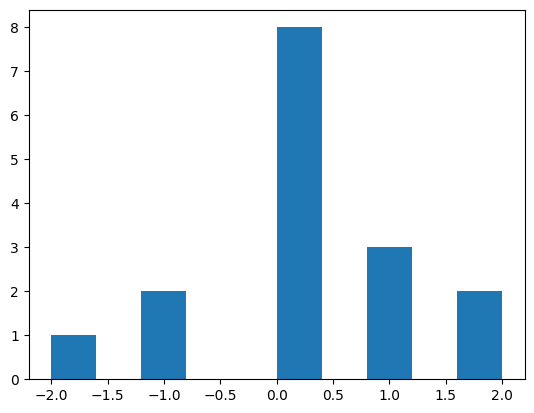

In [17]:
plt.hist(quasi_results[:, 0, 0, 1])
plt.show()

In [18]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

0.7164551519745493 0.4847166429489901


Medain compleatly trash, or just conservative?

In [19]:
print(quasi_results[:, 1, 0, 1].flatten())

[ 0.  0.  0.  1.  0.  0.  2.  0. -1.  0.  0.  0. -3.  0.  0.  0.]


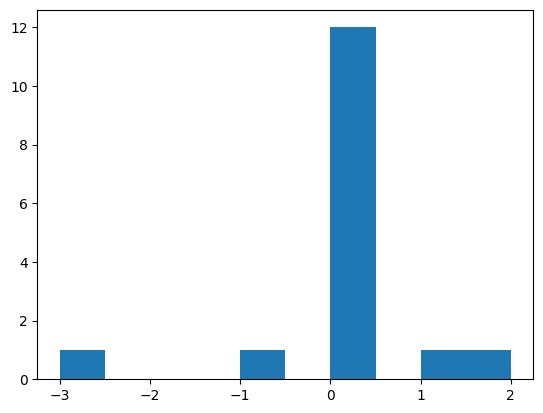

In [20]:
plt.hist(quasi_results[:, 1, 0, 1])
plt.show()

In [21]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 1, 0, 1], popmean=0) 
print(t_statistic , p_value)

-0.250522466609585 0.8055823354747511


Investigating the statisitcs of itteration maximazing the average number of biological components.

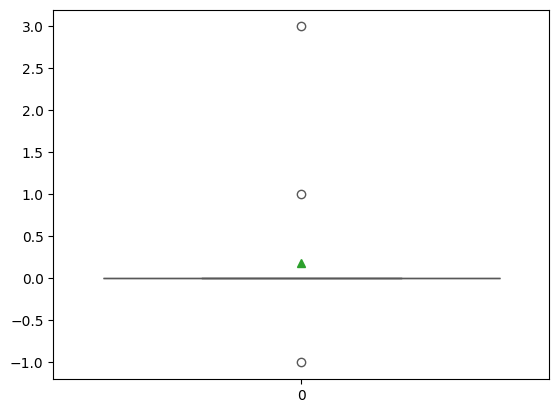

In [22]:
plot_n_boxplots([quasi_results[:, 1, 1, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

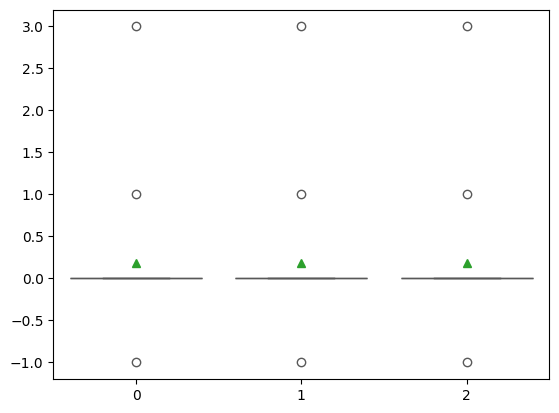

In [23]:
plot_n_boxplots([quasi_results[:, 1, 1, 2].flatten(), quasi_results[:, 1, 1, 2].flatten(), quasi_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

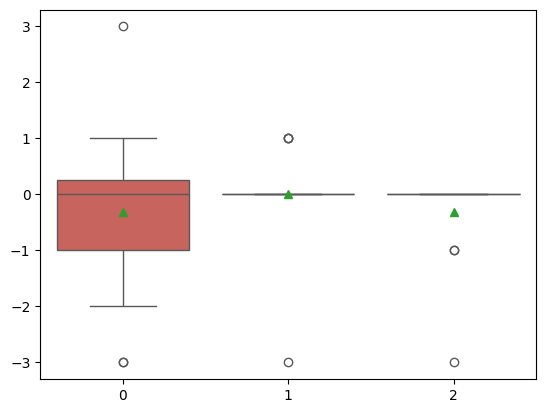

In [24]:
plot_n_boxplots([quasi_results[:, 0, 0, 2].flatten(), quasi_results[:, 0, 1, 2].flatten(), quasi_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [25]:
print(quasi_results[:, 1, 1, 2].flatten())

[ 0.  0.  3.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]


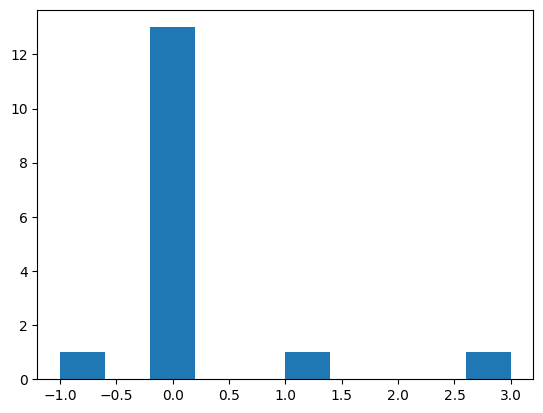

In [26]:
plt.hist(quasi_results[:, 1, 1, 2])
plt.show()

In [27]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 1, 1, 2], popmean=0) 
print(t_statistic , p_value)

0.8991013477539305 0.38280531545032936


Then Analysis of how peaks thresholding does on its own

In [28]:
peak_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\0\peak")
peak_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\1\peak")

In [32]:
peak_ec_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [33]:
peak_eo_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [34]:
for i, pth in enumerate(peak_ec_folder.iterdir()):
    current = np.load(pth)
    peak_ec_results[i, :, :, :] = current.copy()

In [35]:
for i, pth in enumerate(peak_eo_folder.iterdir()):
    current = np.load(pth)
    peak_eo_results[i, :, :, :] = current.copy()

In [37]:
peak_results = peak_ec_results.__add__(peak_ec_results)/2

In [38]:
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

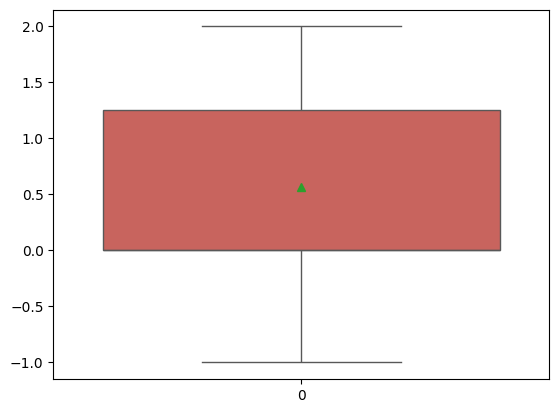

In [39]:
plot_n_boxplots([peak_results[:, 1, 1, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

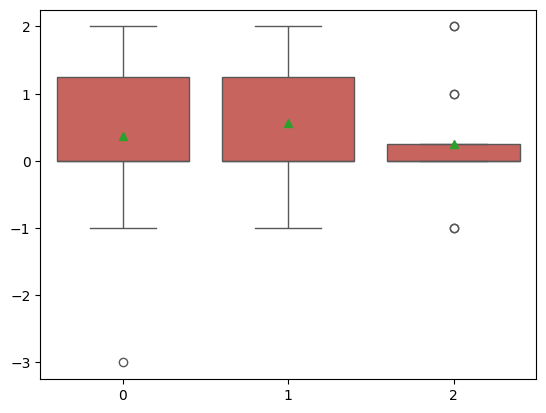

In [40]:
plot_n_boxplots([peak_results[:, 1, 0, 1].flatten(), peak_results[:, 1, 1, 1].flatten(), peak_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

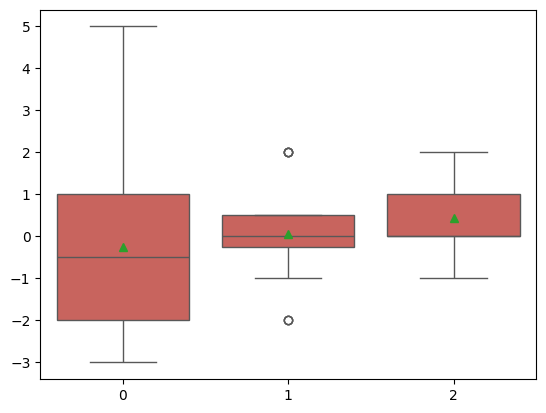

In [41]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten(), peak_results[:, 0, 1, 1].flatten(), peak_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [42]:
print(peak_results[:, 1, 1, 1].flatten())

[ 0.  0.  1.  2.  0.  1.  0.  2. -1.  0.  0.  2.  0.  2.  0.  0.]


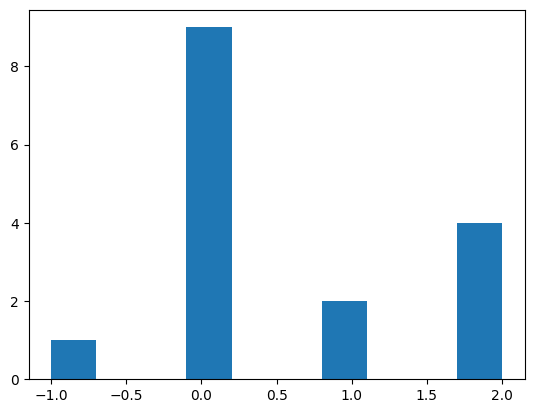

In [43]:
plt.hist(peak_results[:, 1, 1, 1])
plt.show()

In [44]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 1, 1, 1], popmean=0) 
print(t_statistic , p_value)

2.334187330372938 0.033903591629393715


Mean seems a lot worse?

In [47]:
print(peak_results[:, 0, 2, 1].flatten())

[ 0.  0.  1.  2.  0.  1.  0.  2. -1.  0.  0.  0.  0.  2.  0.  0.]


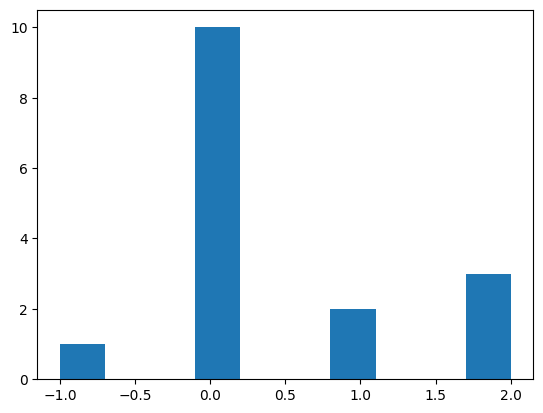

In [48]:
plt.hist(peak_results[:, 0, 2, 1])
plt.show()

In [49]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 2, 1], popmean=0)
print(t_statistic , p_value)

1.961674677225308 0.06863241753070139


Investigating the statisitcs of itteration maximazing the average number of biological components.

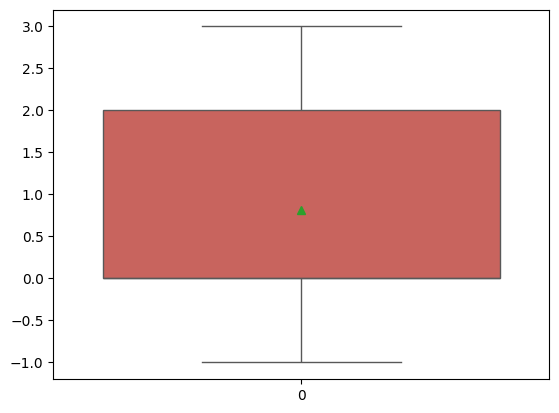

In [50]:
plot_n_boxplots([peak_results[:, 1, 1, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

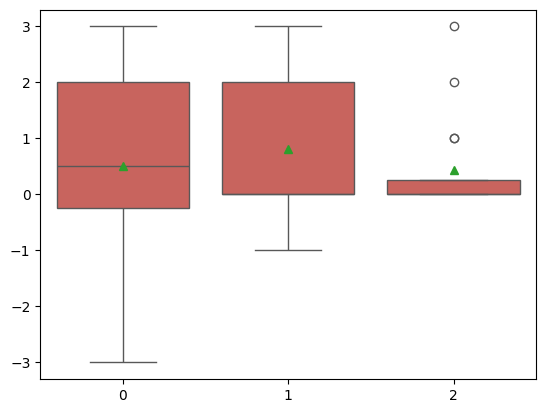

In [51]:
plot_n_boxplots([peak_results[:, 1, 0, 2].flatten(), peak_results[:, 1, 1, 2].flatten(), peak_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

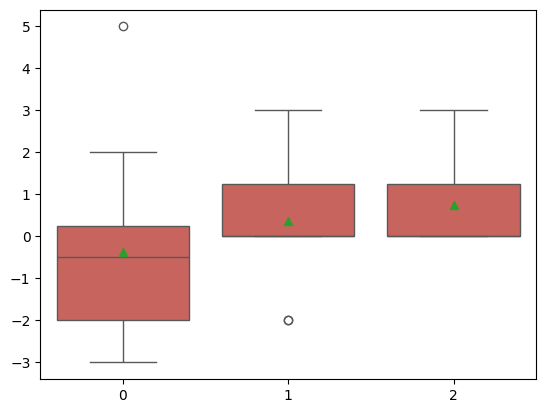

In [52]:
plot_n_boxplots([peak_results[:, 0, 0, 2].flatten(), peak_results[:, 0, 1, 2].flatten(), peak_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [53]:
print(peak_results[:, 1, 1, 2].flatten())

[ 0.  0.  3.  1. -1.  1.  0.  2.  0.  0.  0.  2.  0.  2.  3.  0.]


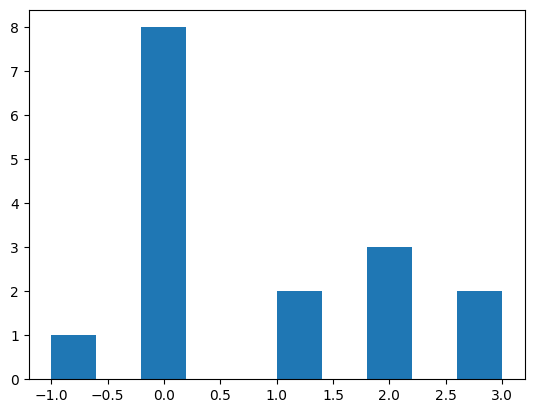

In [54]:
plt.hist(peak_results[:, 1, 1, 2])
plt.show()

In [55]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 1, 1, 2], popmean=0) 
print(t_statistic , p_value)

2.657307158957608 0.017927607211919862


Compared to mean

In [56]:
print(peak_results[:, 0, 2, 2].flatten())

[0. 0. 3. 1. 0. 1. 0. 2. 0. 0. 0. 0. 0. 2. 3. 0.]


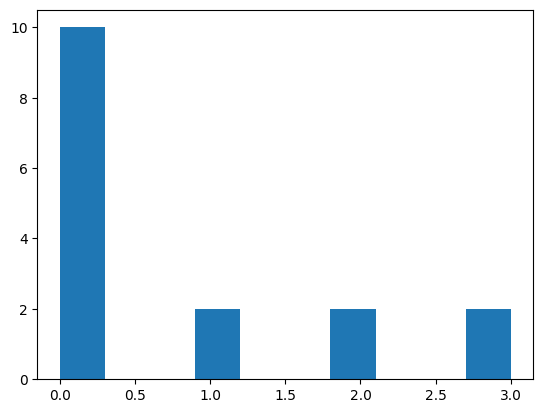

In [57]:
plt.hist(peak_results[:, 0, 2, 2])
plt.show()

In [58]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 2, 2], popmean=0) 
print(t_statistic , p_value)

2.6655699499159153 0.017633799265696314


Then comined!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [59]:
combined_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\0\combined")
combined_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\1\combined")

In [60]:
combined_ec_results = np.zeros(
    (   
        16,
        2,
        3,
        2,
        3,
        5
    )
)

In [61]:
combined_eo_results = np.zeros(
    (   
        16,
        2,
        3,
        2,
        3,
        5
    )
)

In [62]:
for i, pth in enumerate(combined_ec_folder.iterdir()):
    current = np.load(pth)
    combined_ec_results[i, :, :, :, :, :] = current.copy()

In [63]:
for i, pth in enumerate(combined_eo_folder.iterdir()):
    current = np.load(pth)
    combined_eo_results[i, :, :, :, :, :] = current.copy()

In [64]:
combined_results = combined_ec_results.__add__(combined_ec_results)/2

In [66]:
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 0], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 1], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 2], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 3], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 4], 0)), (2, 3, 2, 3)))

(0, 0, 0, 0)
(0, 0, 0, 0)
(1, 1, 1, 0)
(0, 0, 0, 1)
(0, 1, 1, 1)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

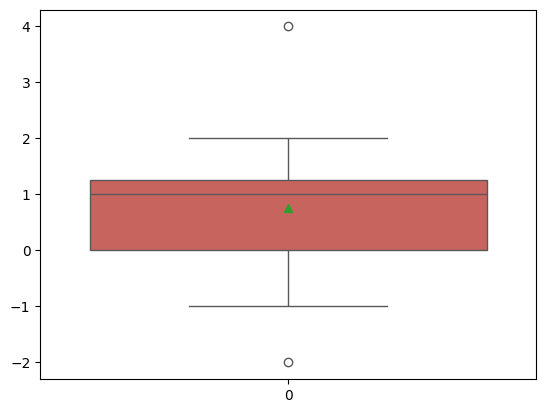

In [67]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

In [68]:
print(combined_results[:, 0, 0, 0, 0, 1].flatten())

[ 1.  1.  1.  1.  2.  0.  2.  1.  0. -1.  2.  0. -2.  4.  0.  0.]


Seems to be doing quite a lot better, at least for some eegs

Compared to the other thresholds

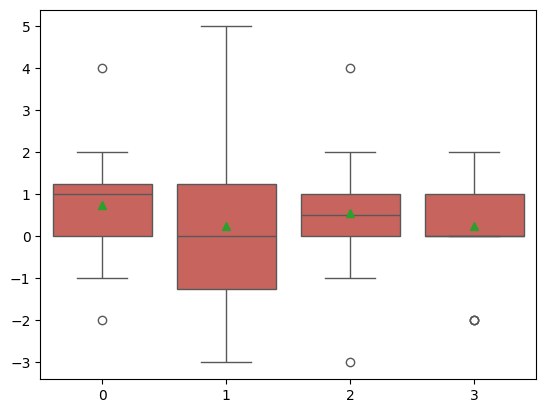

In [69]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1], combined_results[:, 0, 1, 0, 0, 1], combined_results[:, 0, 0, 0, 1, 1], combined_results[:, 0, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Still seem best but number 2 maybe a bit more robust?

More stats for the best one.

In [70]:
print(combined_results[:, 0, 0, 0, 0, 1].flatten())

[ 1.  1.  1.  1.  2.  0.  2.  1.  0. -1.  2.  0. -2.  4.  0.  0.]


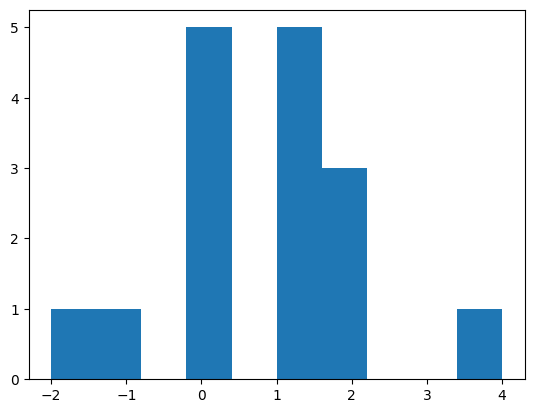

In [71]:
plt.hist(combined_results[:, 0, 0, 0, 0, 1])
plt.show()

In [72]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 0, 0, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

2.157584856684229 0.04758546071777187


Investigating the statisitcs of itteration maximazing the average number of biological components.

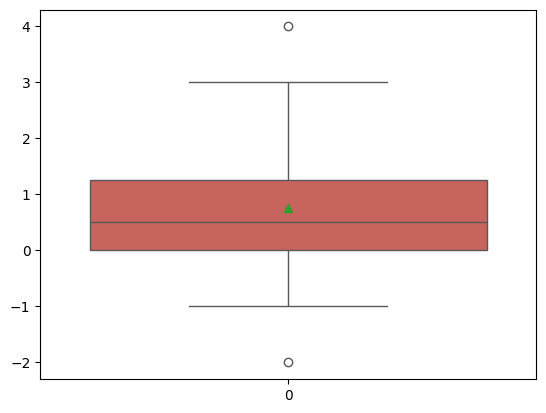

In [73]:
plot_n_boxplots([combined_results[:, 1, 1, 1, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

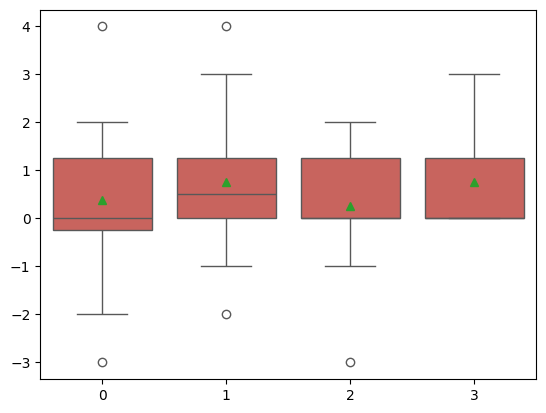

In [74]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 0, 2], combined_results[:, 1, 1, 1, 0, 2], combined_results[:, 1, 0, 1, 1, 2], combined_results[:, 1, 1, 1, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Here, the lower thresholds not so robust.

More stats for the best one.

In [75]:
print(combined_results[:, 1, 1, 1, 0, 2].flatten())

[-2.  0.  3.  1.  0.  1.  1.  1.  4.  0. -1.  2.  0.  2.  0.  0.]


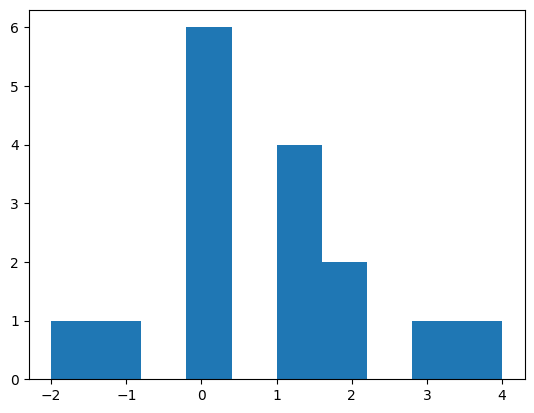

In [76]:
plt.hist(combined_results[:, 1, 1, 1, 0, 2])
plt.show()

In [77]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 1, 1, 1, 0, 2], popmean=0) 
print(t_statistic , p_value)

2.0225995873897262 0.06131926430889827


The lower "robust" threshold even worse here?